PROJECT ON PREDICTING WATER POTABILITY

Importing the libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import tree


DATA EXPLORATION

In [44]:
df=pd.read_csv('/content/water_potability.csv')

In [45]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [46]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [47]:
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [48]:
df.tail()

ph    Hardness       Solids  Chloramines     Sulfate  \
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459761       16.140368        78.698446   2.309149           1

In [49]:
df.shape

(3276, 10)

DATA PRE-PROCESSING (DATA CLEANING)

In [50]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

We can see that ph, sulfate and trihalomethanes feature contains 491,781 and 162 null values.
Now here we find out means for each attribute or feature containing missing values as shown below:

In [51]:
print("ph mean:",df["ph"].mean())
print("Sulfate mean:",df["Sulfate"].mean())
print("Trihalomethanes mean:", df["Trihalomethanes"].mean())


ph mean: 7.080794504263196
Sulfate mean: 333.775776610501
Trihalomethanes mean: 66.39629294665929


We will fill our data having missing values with these average values

In [52]:
df['ph'] = df['ph'].fillna(7.0)
df['Sulfate'] = df['Sulfate'].fillna(333.7)
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(66.3)

In [53]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Hence, you can observe that all the null values has been replaced by average values and no null
values are left in our data. Therefore, our data is treated. Now, we can move to data visualization.

DATA VISUALISATION

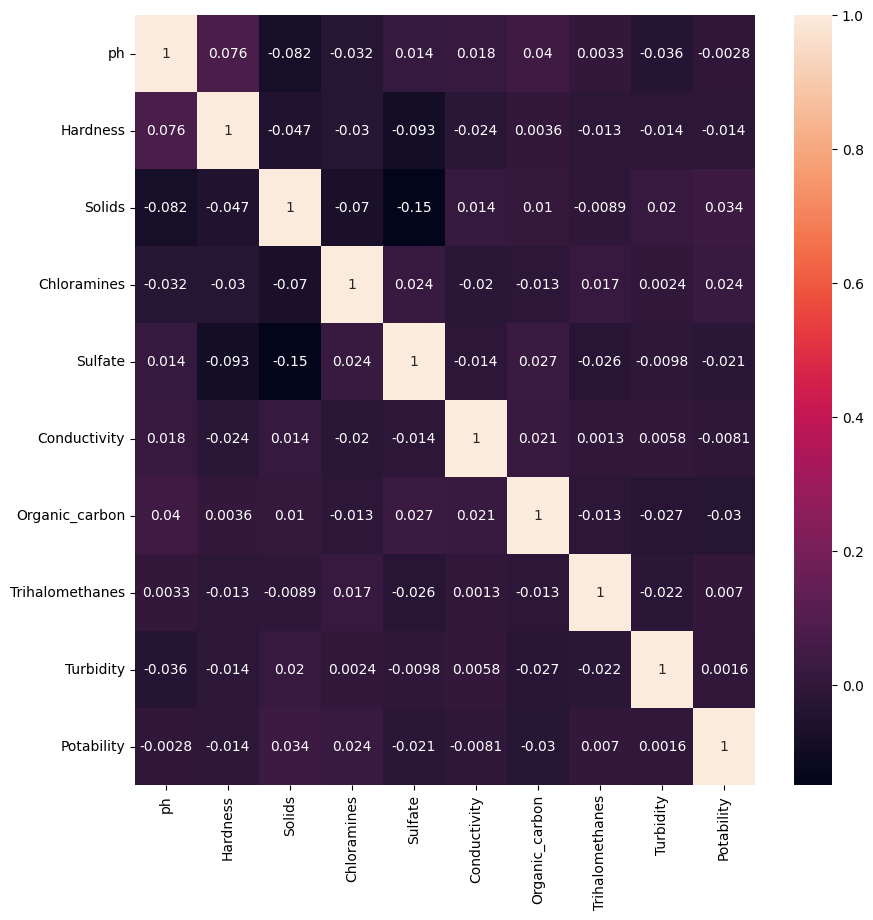

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2g")
plt.show()

Here, we can see that Solids is correlating well as per heatmap. Here in this map, potability is
showing 0.034(highest positive value) with relation to Solids.


In [55]:
# Splitting the data
X = df.drop("Potability", axis=1)
y = df["Potability"]

Spliting the data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<ipython-input-57-0ee94eb9a16a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette={'0': 'skyblue', '1': 'lightgreen'})


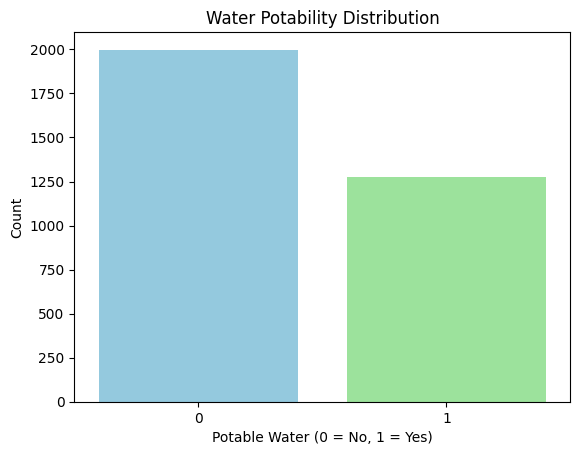

In [57]:

sns.countplot(x=y, palette={'0': 'skyblue', '1': 'lightgreen'})
plt.xlabel('Potable Water (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Water Potability Distribution')
plt.show()

In [58]:
# Percentage of potable water
print(f"Potable water percentage: {y.mean() * 100:.2f}%")

Potable water percentage: 39.01%


Purpose: To easily see trends or outliers in potable water features

In [59]:
df[df['Potability'] == 1].describe().T.style.background_gradient(subset=['mean','std','50%','count'])


👉 Same as above, but for non-potable water (Potability == 0)

In [60]:
df[df['Potability'] == 0].describe().T.style.background_gradient(subset=['mean','std','50%','count'])


Gives basic statistical summary (count, mean, std, min, max, quartiles) for all features in x (i.e., your feature set after dropping "Potability").

In [61]:
X.describe()


ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.068685   196.369496  22014.092526     7.122277   333.757711   
std       1.470239    32.879761   8768.570828     1.583085    36.142627   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690300     6.127421   317.094638   
50%       7.000000   196.967627  20927.833605     7.130299   333.700000   
75%       7.870050   216.667456  27332.762125     8.114887   350.385756   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3276.000000  3276.000000  
mean     426.205111       14.284970        66.391531     3.966786  
std       80.824064        3.308162        15.769895     0.780382  
min      181.483754        2.200000         0.738000     1.450000  
25%      365.734414       12.065801        56.647656     3.439711  
50%      421.884968       14.218338        66.300000     3.955028  
75%      481.792305       16.557652        76.666609     4.500320  
max      753.342620       28.300000       124.000000     6.739000

DATA VISUALIZATION

Drops the target column (Potability)
Plots histograms for all other features in the same figure
Gives you an idea of:
Skewness
Outliers
Feature distribution (normal, uniform, etc.)

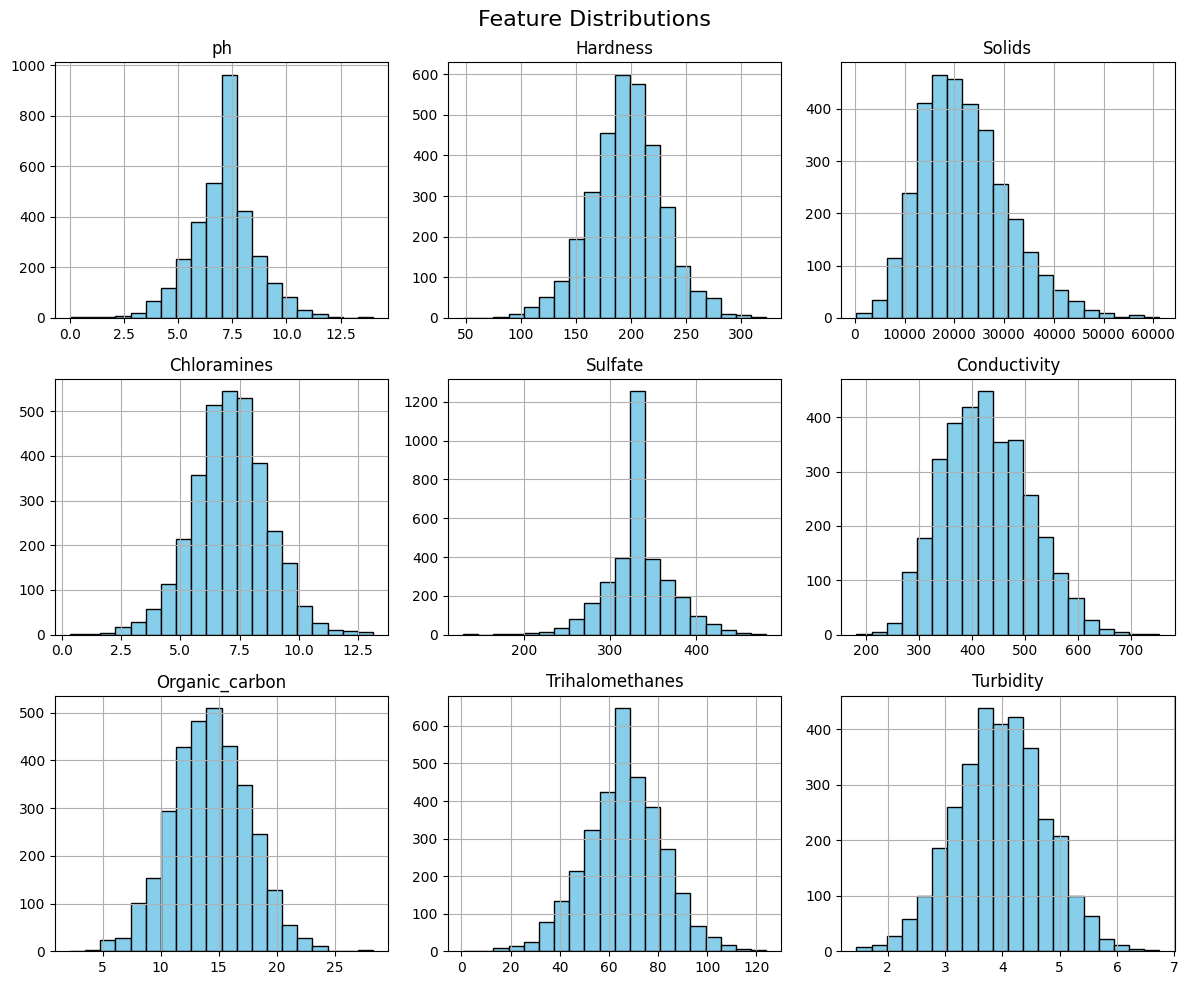

In [62]:
df.drop("Potability", axis=1).hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


All features have a very similar distribution of their values. In addition, they all show a very
gaussian form so there is no need to normalize any feature.

 We represent the distribution of the 'ph' variable by counting the number of observations that fall within discrete bins (histogram).
By setting kde=True, we add a Kernel Density Estimate (KDE) curve,
 which smooths the distribution and displays it as a line.
KDE is only relevant for univariate data (one variable at a time), helping visualize the underlying distribution more smoothly.

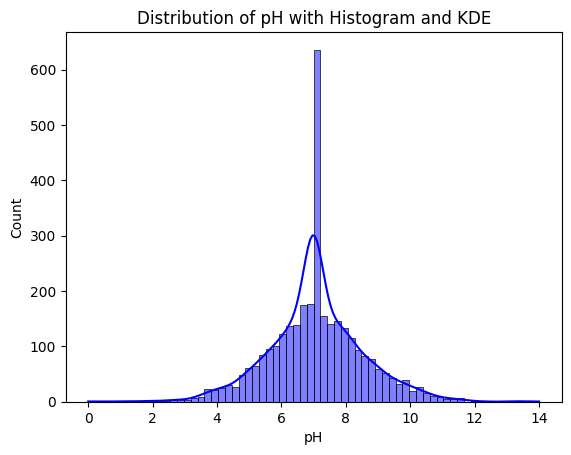

In [63]:
sns.histplot(df['ph'], kde=True, color='blue')
plt.title('Distribution of pH with Histogram and KDE')
plt.xlabel('pH')
plt.ylabel('Count')
plt.show()

In [64]:
df[['ph','Sulfate','Trihalomethanes']].describe().T


count        mean        std      min         25%    50%  \
ph               3276.0    7.068685   1.470239    0.000    6.277673    7.0   
Sulfate          3276.0  333.757711  36.142627  129.000  317.094638  333.7   
Trihalomethanes  3276.0   66.391531  15.769895    0.738   56.647656   66.3   

                        75%         max  
ph                 7.870050   14.000000  
Sulfate          350.385756  481.030642  
Trihalomethanes   76.666609  124.000000

Purpose:
To check the interaction between pH and Sulfate values and how they relate to water potability. This helps identify patterns or clusters that separate potable and non-potable samples.

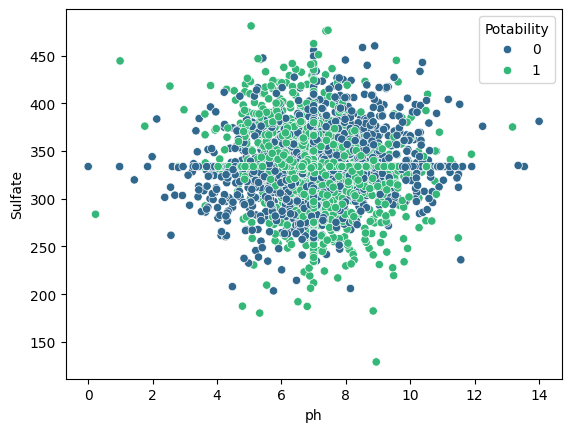

In [65]:
sns.scatterplot(data=df, x="ph", y="Sulfate", hue="Potability", palette="viridis")
plt.show()

To explore how pH level and Trihalomethanes vary together, and whether this relationship differs between potable and non-potable water. It helps understand if pH affects the presence of Trihalomethanes related to water safety

<Axes: xlabel='ph', ylabel='Trihalomethanes'>

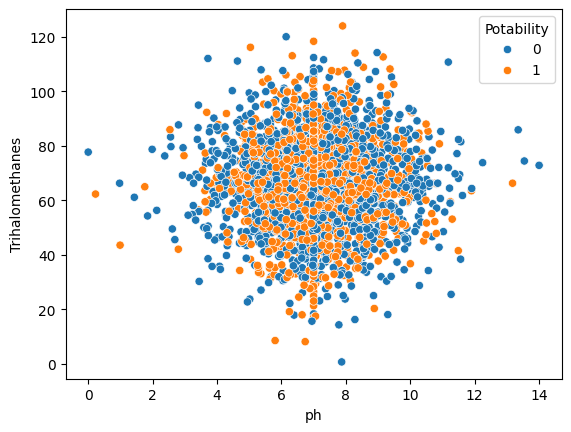

In [66]:
sns.scatterplot(data = df,x='ph',y="Trihalomethanes",hue="Potability")


Purpose:
To visualize the relationship between Trihalomethanes and Sulfate in the water samples, and see if their values differ for potable (safe) vs non-potable (unsafe) water. The colors help distinguish potable vs non-potable group

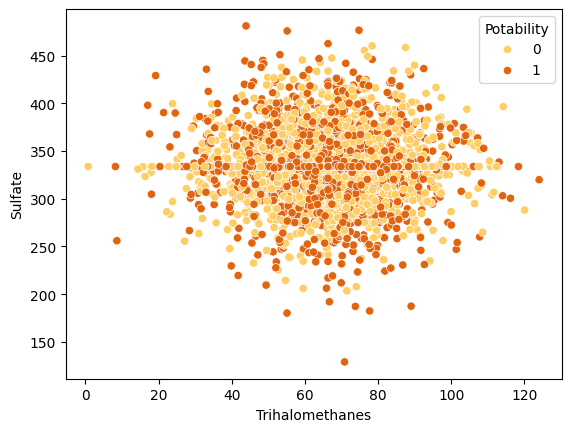

In [67]:
sns.scatterplot(data=df, x="Trihalomethanes", y="Sulfate", hue="Potability", palette="YlOrBr")
plt.show()


Purpose:
To examine pairwise relationships between all variables/features for potable water samples only. This helps to understand how the different chemical measurements relate when water is safe.

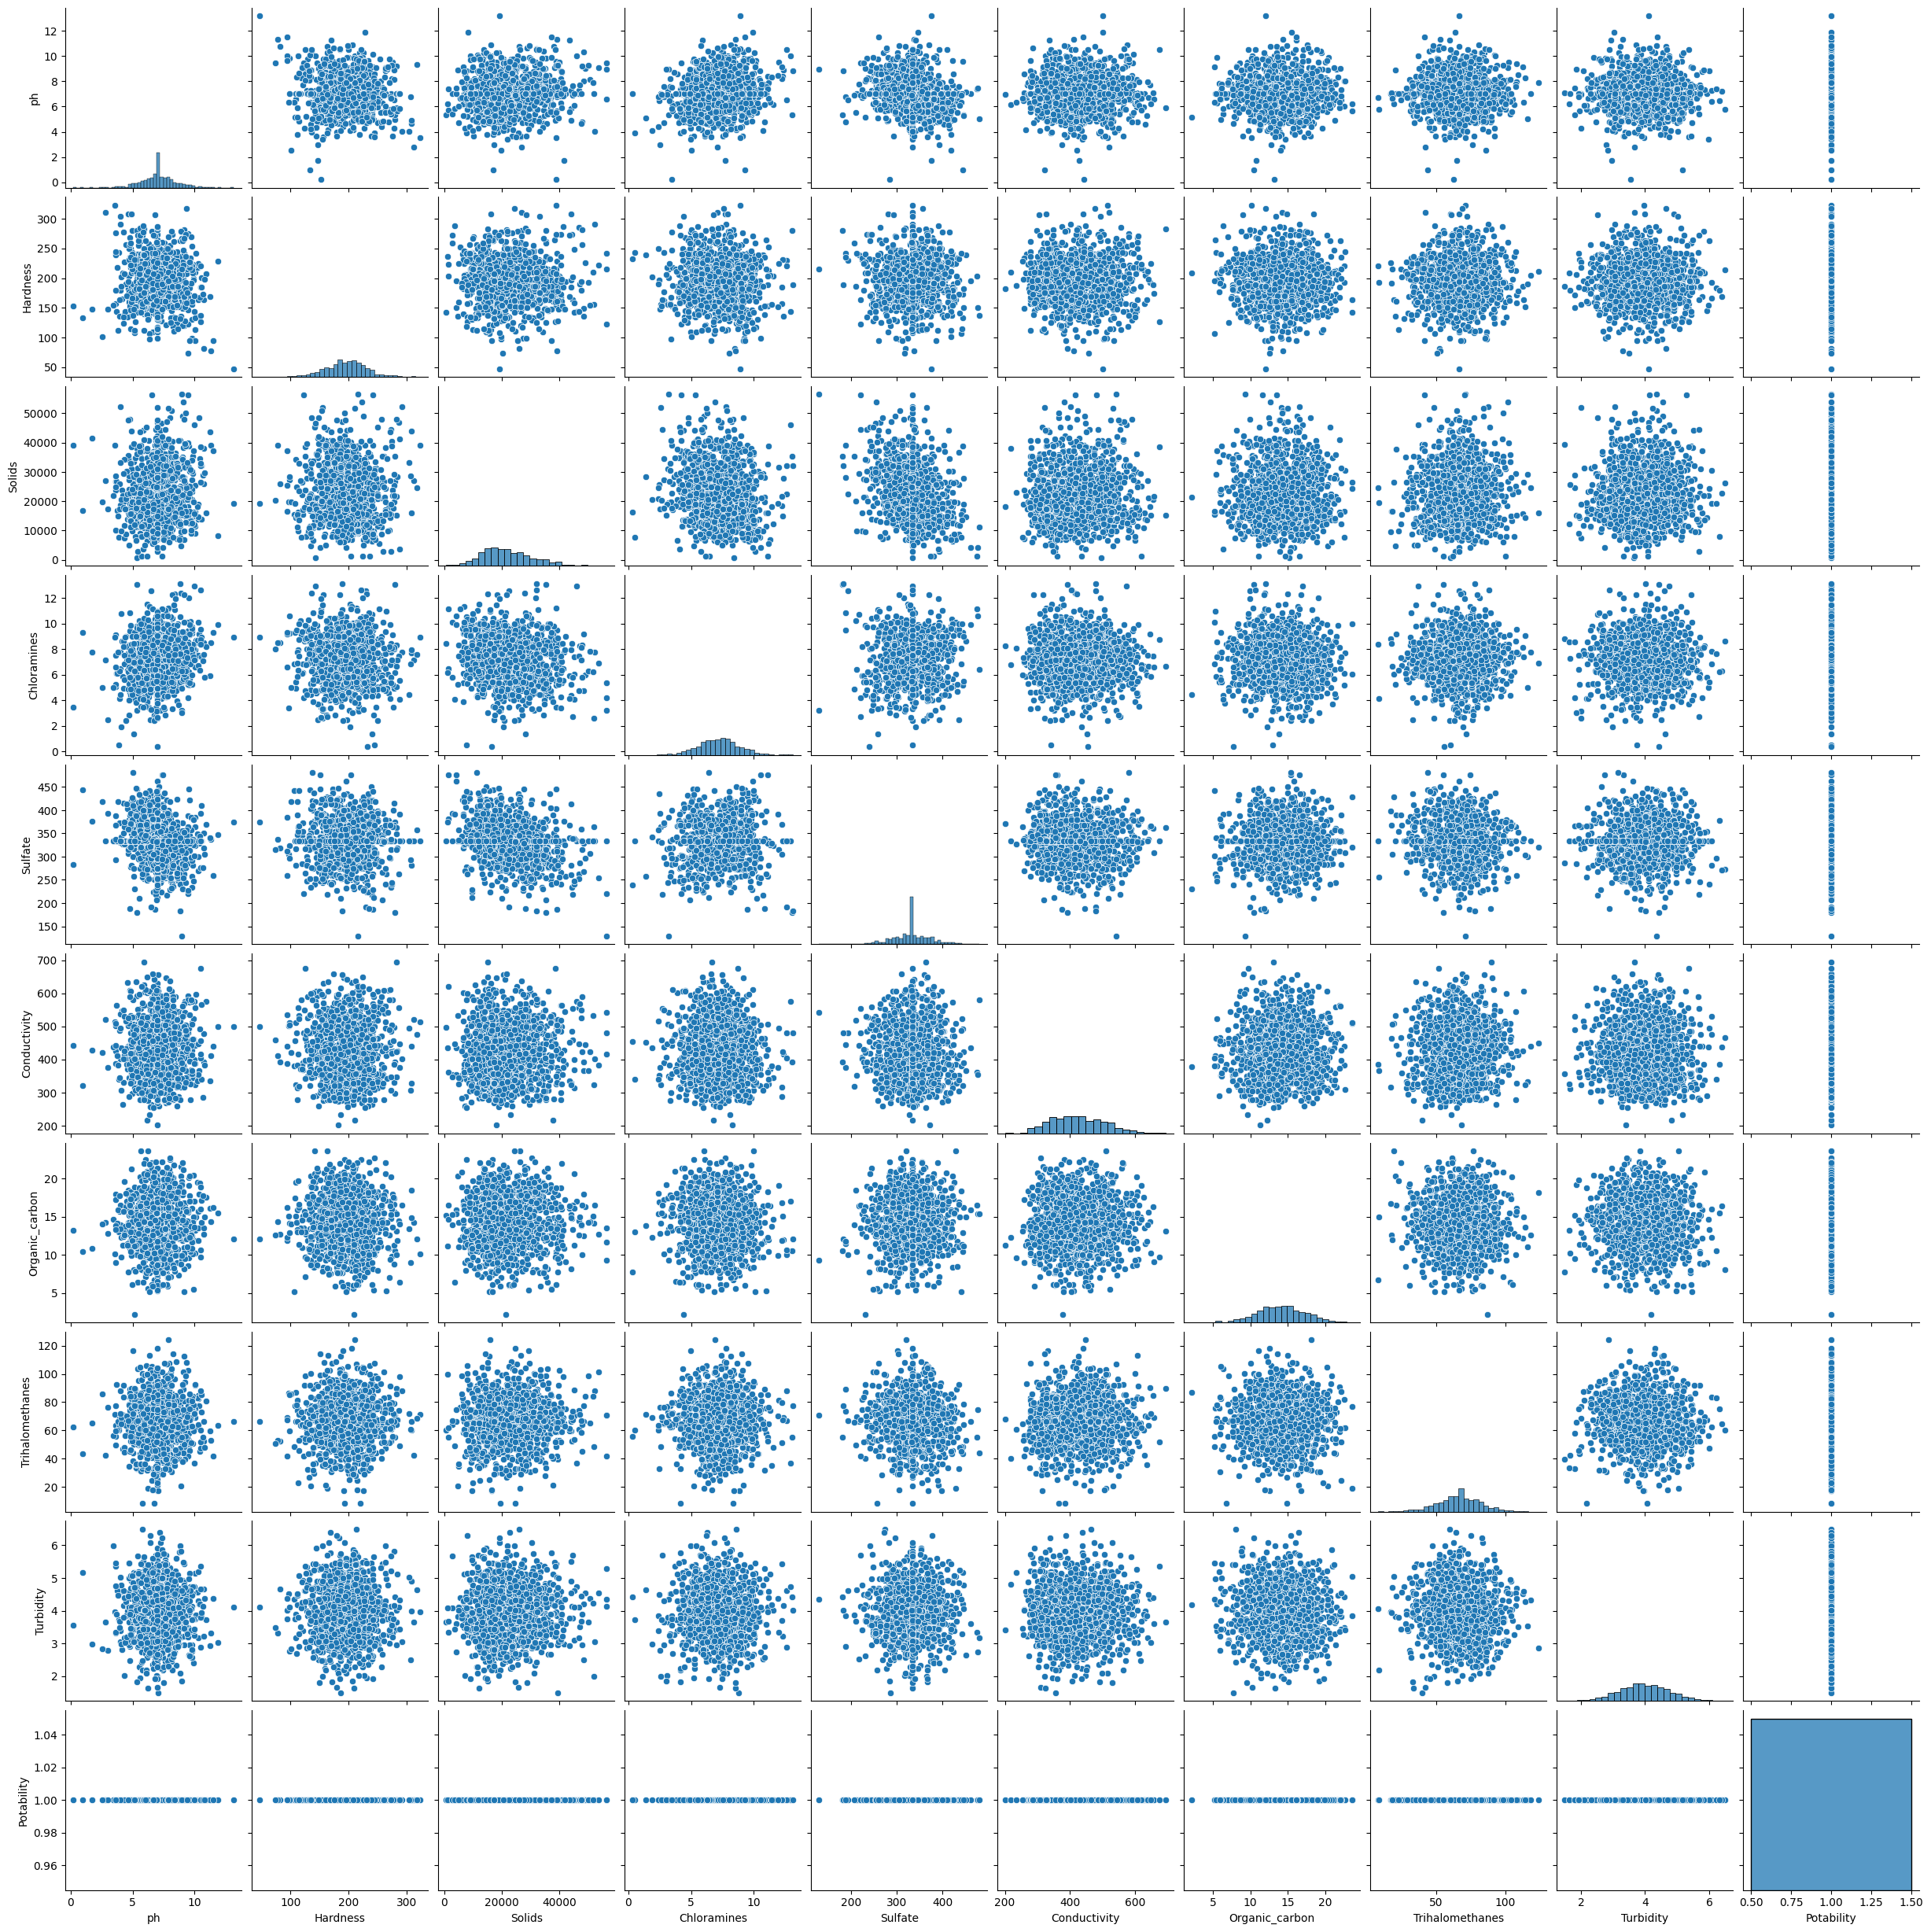

In [68]:
 positive = df[df['Potability'] == 1]
sns.pairplot(positive)


To examine pairwise relationships between all variables/features for non-potable water samples. Comparing this with the positive pairplot helps find patterns or feature interactions unique to unsafe water.

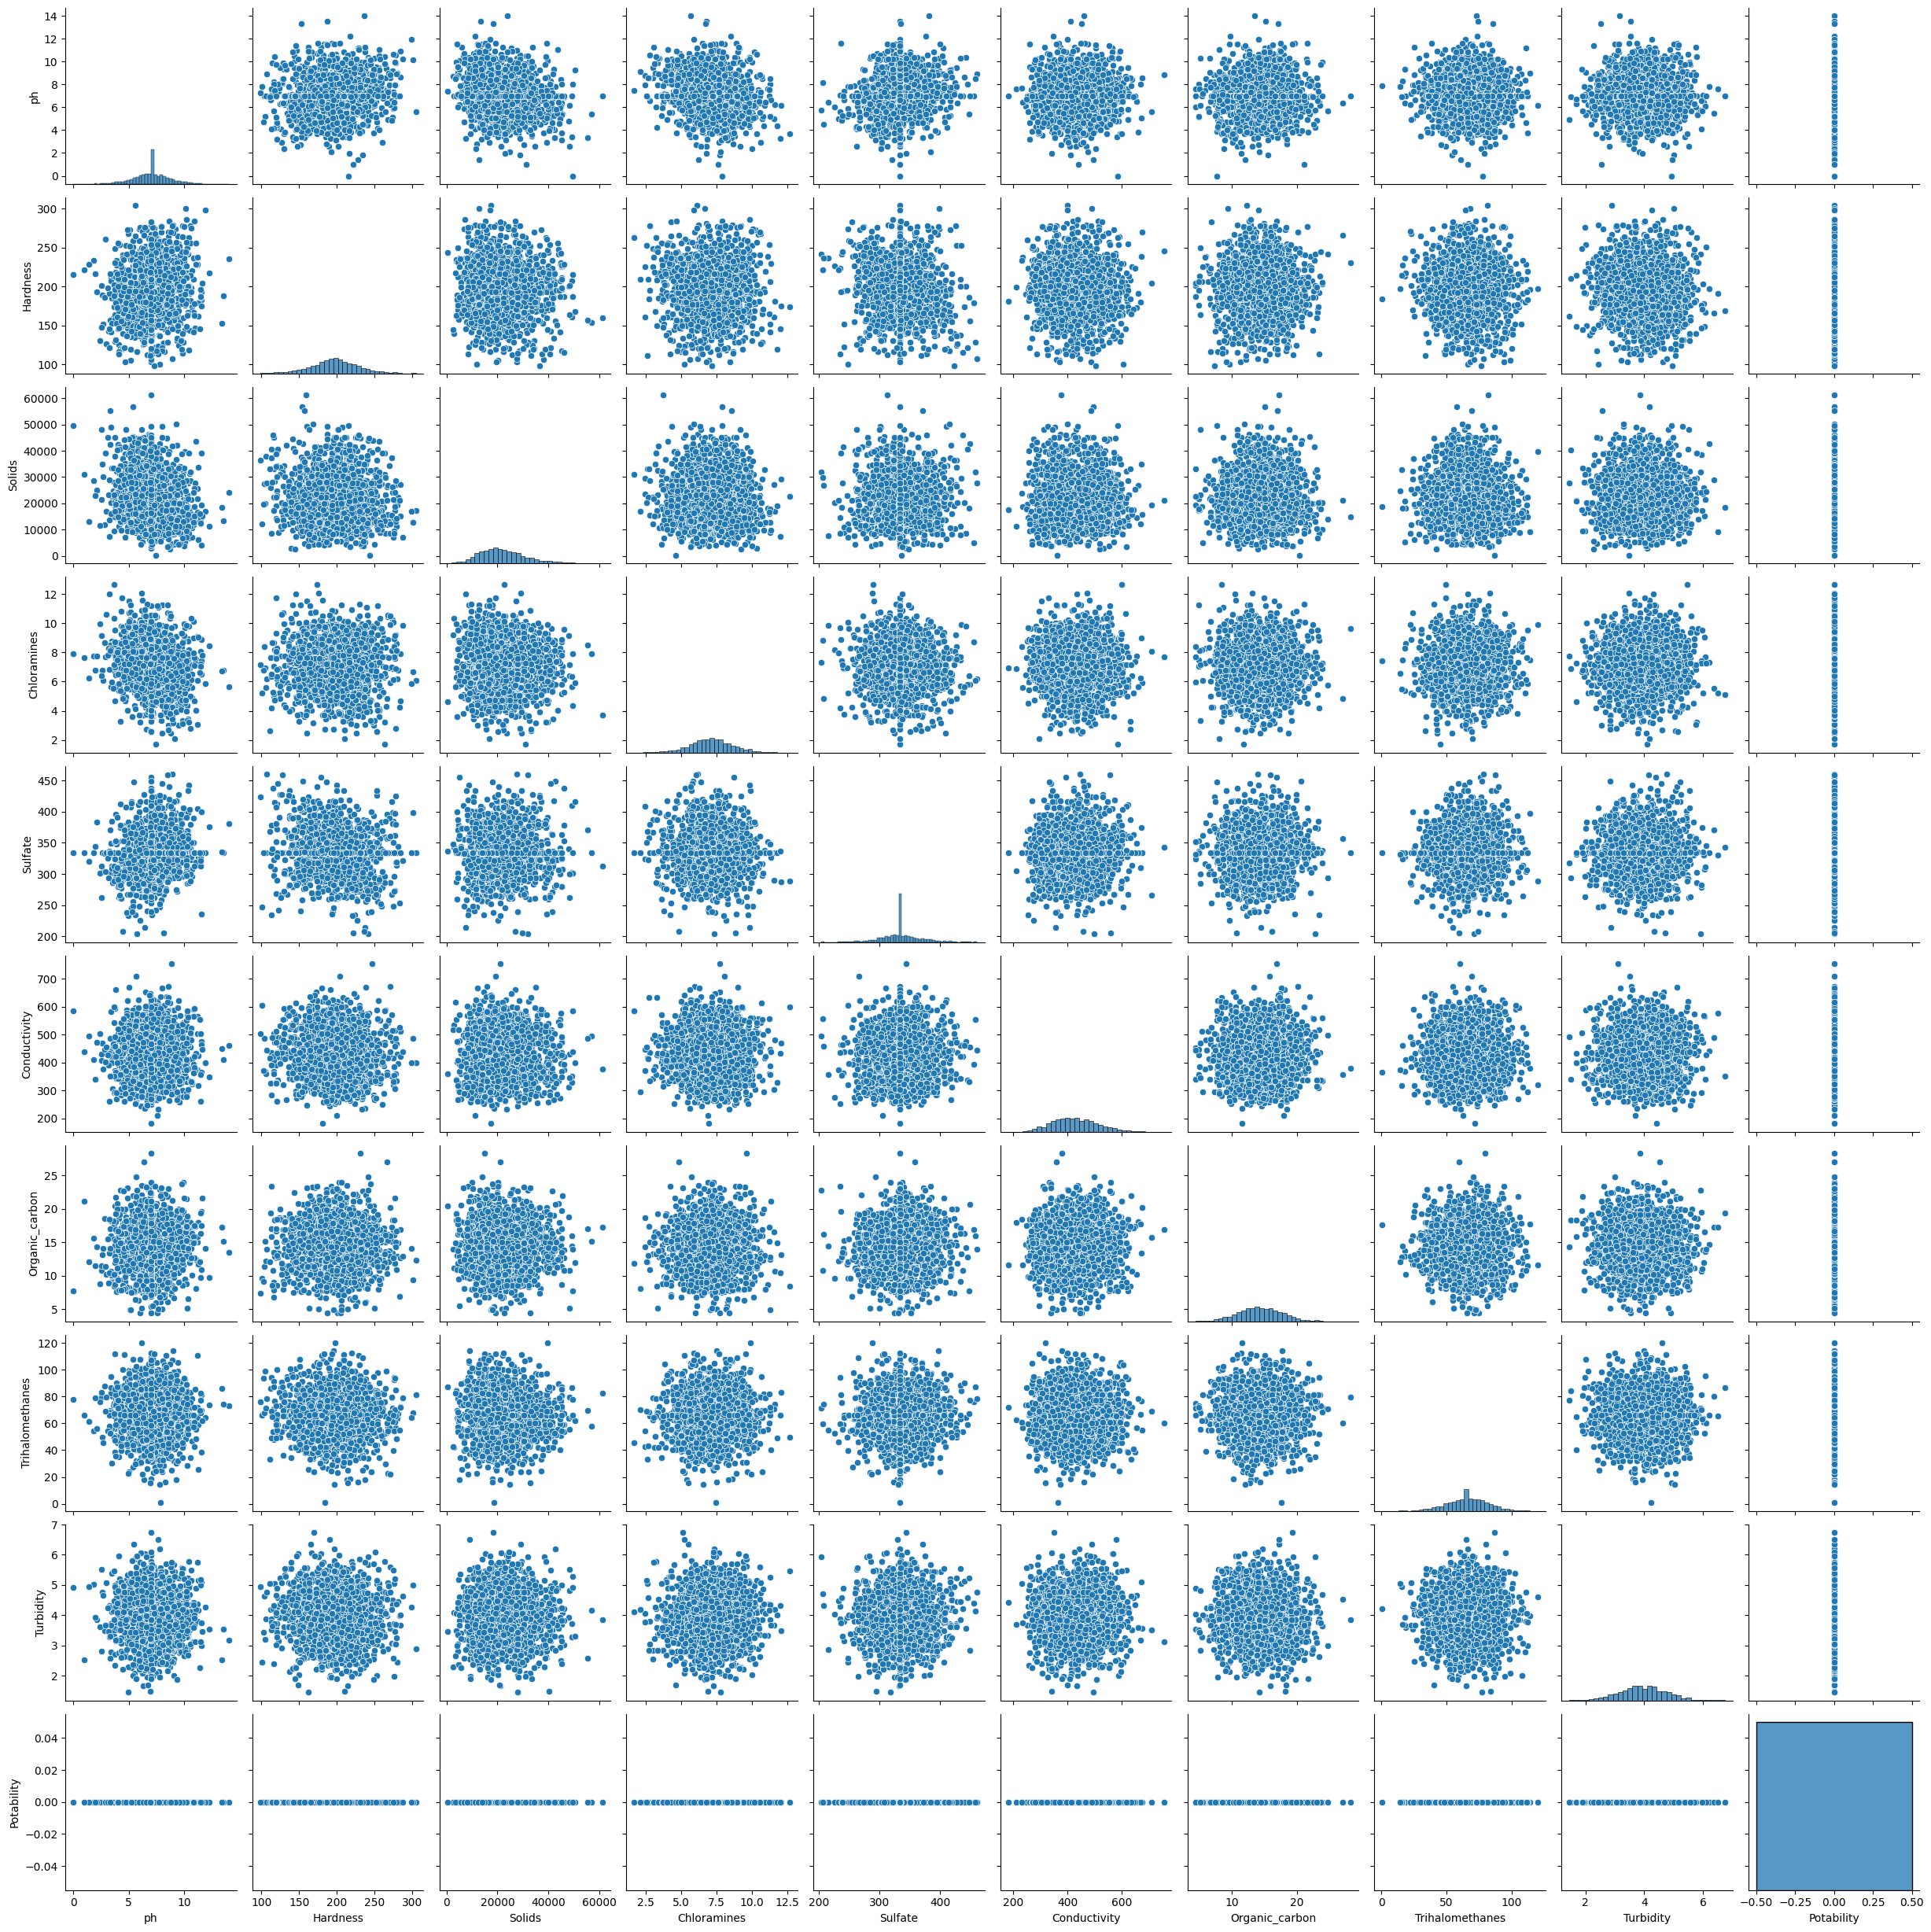

In [69]:
negative = df[df['Potability'] == 0]
sns.pairplot(negative)


IMPLEMENTATION OF ALGORITHMS

Why use hyperparameter tuning:
“To improve model performance by finding the best settings that help the model generalize well on new data.”

Why use GridSearchCV:
“To automatically search for the best hyperparameters using cross-validation, ensuring more reliable and accurate model tuning.”

 Logistic Regression
 Without Hyperparameter Tuning

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
y_pred = model.predict(X_test)

print("Without Hyperparameter Tuning:")
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print(classification_report(y_test, y_pred))


Without Hyperparameter Tuning:
Training Accuracy: 0.6056166056166056
Testing Accuracy: 0.6227106227106227
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       510
           1       0.00      0.00      0.00       309

    accuracy                           0.62       819
   macro avg       0.31      0.50      0.38       819
weighted avg       0.39      0.62      0.48       819



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


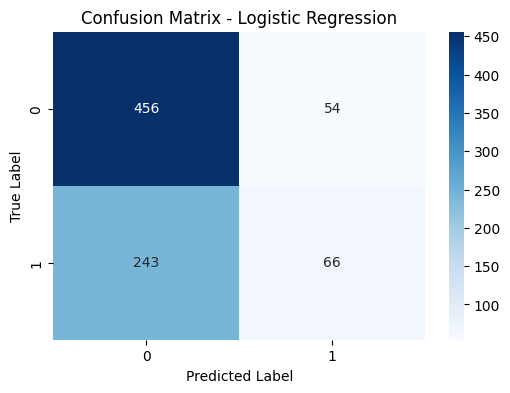

In [81]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

With Hyperparameter Tuning (GridSearchCV)


You can apply GridSearchCV directly on Logistic Regression, but **best practice is to put it inside a pipeline with scaling** for correct and effective tuning.


In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

params = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(pipe, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Test Accuracy:", grid_search.score(X_test, y_test))

print("Training Accuracy:", grid_search.score(X_train, y_train))


Best Params: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Test Accuracy: 0.6227106227106227
Training Accuracy: 0.6056166056166056


 Decision Tree Without Tuning

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
y_pred = model.predict(X_test)

print("Decision Tree Without Tuning")
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print(classification_report(y_test, y_pred))


Decision Tree Without Tuning
Training Accuracy: 1.0
Testing Accuracy: 0.5934065934065934
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       510
           1       0.47      0.53      0.50       309

    accuracy                           0.59       819
   macro avg       0.58      0.58      0.58       819
weighted avg       0.61      0.59      0.60       819



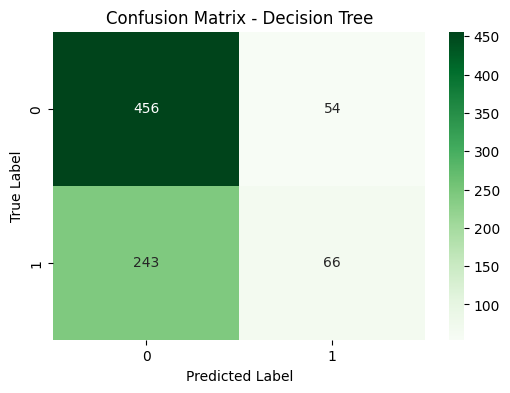

In [82]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

With GridSearchCV Tuning

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

train_acc = best_model.score(X_train, y_train)
test_acc = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)

print("Decision Tree With Tuning")
print("Best Params:", grid_search.best_params_)
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print(classification_report(y_test, y_pred))


Decision Tree With Tuning
Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Training Accuracy: 0.6731786731786732
Testing Accuracy: 0.6471306471306472
              precision    recall  f1-score   support

           0       0.66      0.91      0.76       510
           1       0.59      0.21      0.31       309

    accuracy                           0.65       819
   macro avg       0.62      0.56      0.54       819
weighted avg       0.63      0.65      0.59       819



SVM Without Tuning

In [74]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC()
model.fit(X_train_scaled, y_train)

train_acc = model.score(X_train_scaled, y_train)
test_acc = model.score(X_test_scaled, y_test)
y_pred = model.predict(X_test_scaled)

print("SVM Without Tuning")
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print(classification_report(y_test, y_pred))


SVM Without Tuning
Training Accuracy: 0.7350427350427351
Testing Accuracy: 0.6971916971916972
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       510
           1       0.72      0.32      0.45       309

    accuracy                           0.70       819
   macro avg       0.71      0.62      0.62       819
weighted avg       0.70      0.70      0.66       819



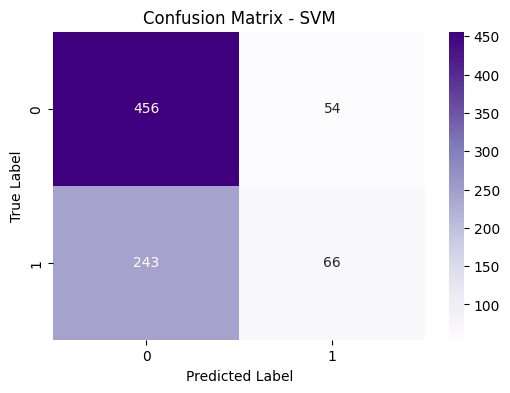

In [83]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

With GridSearchCV Tuning

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svc = SVC()
grid_search = GridSearchCV(svc, param_grid=params, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

train_acc = best_model.score(X_train_scaled, y_train)
test_acc = best_model.score(X_test_scaled, y_test)
y_pred = best_model.predict(X_test_scaled)

print("SVM With Tuning")
print("Best Params:", grid_search.best_params_)
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print(classification_report(y_test, y_pred))


SVM With Tuning
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Training Accuracy: 0.7350427350427351
Testing Accuracy: 0.6971916971916972
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       510
           1       0.72      0.32      0.45       309

    accuracy                           0.70       819
   macro avg       0.71      0.62      0.62       819
weighted avg       0.70      0.70      0.66       819



 K-Nearest Neighbors (KNN) Without Tuning

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

train_acc = model.score(X_train_scaled, y_train)
test_acc = model.score(X_test_scaled, y_test)
y_pred = model.predict(X_test_scaled)

print("KNN Without Tuning")
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print(classification_report(y_test, y_pred))


KNN Without Tuning
Training Accuracy: 0.7582417582417582
Testing Accuracy: 0.6312576312576312
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       510
           1       0.51      0.42      0.46       309

    accuracy                           0.63       819
   macro avg       0.60      0.59      0.59       819
weighted avg       0.62      0.63      0.62       819



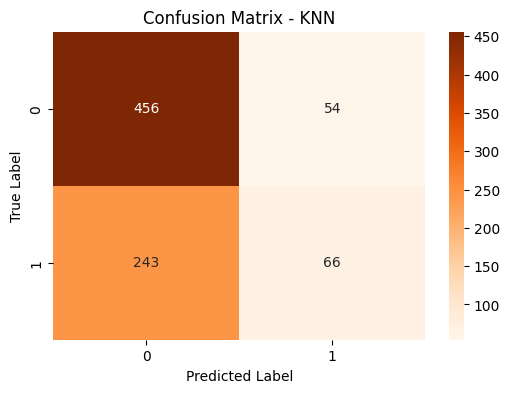

In [84]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

With GridSearchCV Tuning

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid=params, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

train_acc = best_model.score(X_train_scaled, y_train)
test_acc = best_model.score(X_test_scaled, y_test)
y_pred = best_model.predict(X_test_scaled)

print("KNN With Tuning")
print("Best Params:", grid_search.best_params_)
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print(classification_report(y_test, y_pred))


KNN With Tuning
Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Training Accuracy: 1.0
Testing Accuracy: 0.652014652014652
              precision    recall  f1-score   support

           0       0.69      0.82      0.74       510
           1       0.56      0.38      0.45       309

    accuracy                           0.65       819
   macro avg       0.62      0.60      0.60       819
weighted avg       0.64      0.65      0.63       819



In [80]:
print("""
Conclusion:
We tested different machine learning models to predict if water is safe to drink.
- Logistic Regression gave about 62% accuracy.
- Decision Tree was too perfect on training but worse on testing, and got better after tuning.
- SVM gave the best results, about 69% accuracy.
- KNN also improved after tuning and gave good results.

Tuning the models helped make them better and less likely to make mistakes.
SVM worked best for this problem.
""")



Conclusion:
We tested different machine learning models to predict if water is safe to drink.
- Logistic Regression gave about 62% accuracy.
- Decision Tree was too perfect on training but worse on testing, and got better after tuning.
- SVM gave the best results, about 69% accuracy.
- KNN also improved after tuning and gave good results.

Tuning the models helped make them better and less likely to make mistakes.
SVM worked best for this problem.

